## Deteksi Tumor Otak Menggunakan System A.I.
By: *Ari Data Scientis*

Data: *MRI Scan 🧠 From Kaggle*

**Import Library**

In [ ]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

from PIL import Image
from sklearn.model_selection import train_test_split

## Untuk Sel Otak Normal

In [ ]:
normal_cells=os.listdir('/kaggle/input/brain-mri-images-for-brain-tumor-detection/no')

print(normal_cells[0:5])
print(normal_cells[-5:])

['34 no.jpg', 'N20.JPG', 'N1.JPG', '49 no.jpg', 'N15.jpg']
['1 no.jpeg', '2 no.jpeg', '35 no.jpg', 'N6.jpg', '33 no.jpg']


## Untuk Sel Tumor Otak

In [ ]:
tumor_cells=os.listdir('/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes')

print(tumor_cells[0:5])
print(tumor_cells[-5:])

['Y115.JPG', 'Y192.JPG', 'Y162.jpg', 'Y9.jpg', 'Y108.jpg']
['Y113.JPG', 'Y101.jpg', 'Y89.JPG', 'Y44.JPG', 'Y92.png']


#### banyaknya deteksi pada gambar

In [ ]:
print('Length of the Normal Brain Cells: ',len(normal_cells))
print('Length of the Cancurus Brain Cells: ',len(tumor_cells))

Length of the Normal Brain Cells:  98
Length of the Cancurus Brain Cells:  155


-------

## Membuat Label Deteksi

- **0 --> Normal Otak**
- **1 --> Tumor Otak**

In [ ]:
normal_label=[0]*98
tumor_label=[1]*155

In [ ]:
print('Normal Cell labels: ',len(normal_label))
print('Tumor Cell labels: ',len(tumor_label))

Normal Cell labels:  98
Tumor Cell labels:  155


In [ ]:
print('With Normal labels: ',normal_label[0:5])
print('With Tumor labels: ',tumor_label[0:5])

With Normal labels:  [0, 0, 0, 0, 0]
With Tumor labels:  [1, 1, 1, 1, 1]


----------

## Kombinasi Label & Kolom

In [ ]:
labels=normal_label+tumor_label

print('Total labels are: ',len(labels))

print(labels[0:5])
print(labels[-5:])

Total labels are:  253
[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


In [ ]:
type(labels)

list

---------

## Visualisasi Data
## Hasil Deteksi A.I.
## 🧠🦾

### 1) Sel Otak Normal

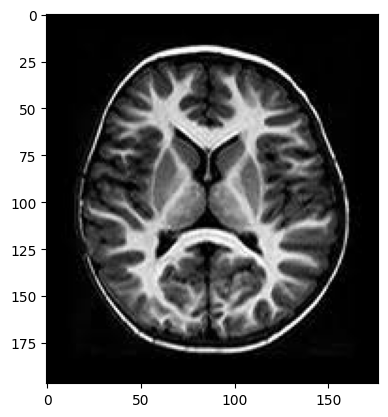

In [ ]:
nor_img=mpimg.imread('/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/14 no.jpg')

plt.imshow(nor_img)

### 2) Sel Tumor Otak

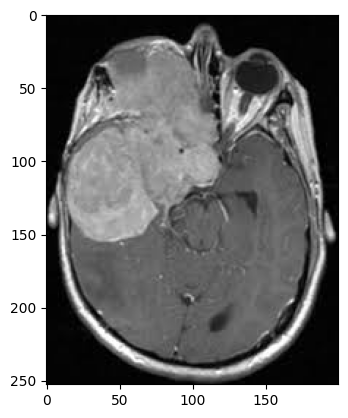

In [ ]:
nor_img=mpimg.imread('/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes/Y106.jpg')

plt.imshow(nor_img)

### 3) Dalam Kolom & Label

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: ylabel='count'>

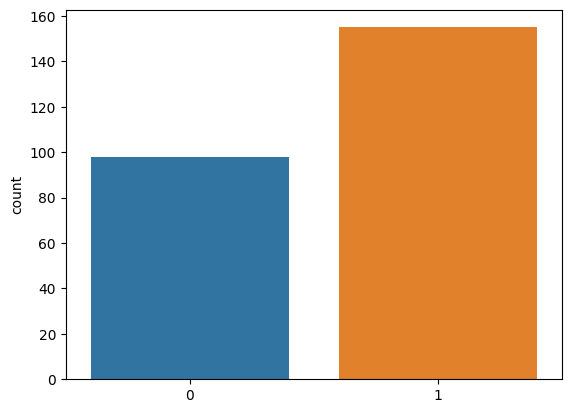

In [ ]:
import seaborn as sn


sn.countplot(x=labels)

------

## Image Preprocessing Steps

In [ ]:
normal_path=('/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/')
data=[]

for img_file in normal_cells:
    image=Image.open(normal_path + img_file)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)

tumor_path=('/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes/')

for img_file in tumor_cells:
    image=Image.open(tumor_path + img_file)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)

In [ ]:
type(data)

list

**total length of the data**

In [ ]:
len(data)

253

**Checking the first image**

In [ ]:
data[0]

array([[[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]],

       [[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]],

       ...,

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]]], dtype=uint8)

In [ ]:
type(data[0])

**Checking the shape of the single image**

In [ ]:
data[0].shape

(128, 128, 3)

----------

## Converting data and labels into numpy array

In [ ]:
X=np.array(data)
Y=np.array(labels)

In [ ]:
type(X)

In [ ]:
type(Y)

In [ ]:
print(X.shape)
print(Y.shape)

---------

## Train Test Split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=101)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

------

## Scaling the data

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
X_train[0]

-------------

## Model Building

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense,Flatten, Dropout

### a) Model Building

In [ ]:
num_of_classes=2

model=Sequential()

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(num_of_classes, activation='sigmoid'))

### b) Compiling the model

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### c) Training the model

In [ ]:
history=model.fit(X_train,Y_train, epochs=50, validation_split=0.1, verbose=1)

### d) Model Evaluation

In [ ]:
model.evaluate(X_test,Y_test)

#### Accuracy is 86%

### e) Learning Curve

**i) Accuracy Curve**

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')

plt.legend()
plt.show()

**ii) Loss Curve**

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')

plt.legend()
plt.show()

----

## Prediction Function

### a) For Normal Cell

In [ ]:
input_image_path=input('Enter the path of the image: ')

input_image=cv2.imread(input_image_path)

plt.imshow(input_image)
plt.show()


# Ensure the shape matches the expected input shape of your model
input_image_reshape=cv2.resize(input_image,(128,128))


# Normalize the pixel values
image_normalized=input_image_reshape/255


# Reshape for model prediction
img_reshape=np.reshape(image_normalized,(1,128,128,3))


# Make Predictions
input_prediction=model.predict(img_reshape)

# Display the prediction Probabilities
print('Prediction Probabilities are:  ',input_prediction)


# Get the Predicted Label
input_pred_label=np.argmax(input_prediction)


if input_pred_label ==1:
    print('Tumor Cell')
else:
    print('Normal Cell')

### b) For Tumor Cell

In [ ]:
input_image_path=input('Enter the path of the image: ')

input_image=cv2.imread(input_image_path)

plt.imshow(input_image)
plt.show()


# Ensure the shape matches the expected input shape of your model
input_image_reshape=cv2.resize(input_image,(128,128))


# Normalize the pixel values
image_normalized=input_image_reshape/255


# Reshape for model prediction
img_reshape=np.reshape(image_normalized,(1,128,128,3))


# Make Predictions
input_prediction=model.predict(img_reshape)

# Display the prediction Probabilities
print('Prediction Probabilities are:  ',input_prediction)


# Get the Predicted Label
input_pred_label=np.argmax(input_prediction)


if input_pred_label ==1:
    print('Tumor Cell')
else:
    print('Normal Cell')

-------

## Saving the Model

In [ ]:
model.save('/kaggle/working/tumor_detection.h5')

-------